In [1]:
from utils import *

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [2]:
# Input data

# Amount of numbers 
center = 10
std = 1
n = 10000

numbers = np.random.normal(center, std, n)

# gaussian = np.random.normal(center, std, n)
# extra_noise = np.random.randint(-100,100,1000)
# numbers = np.concatenate((gaussian, extra_noise))
# n = numbers.shape[0]

In [3]:
# GNC initiation
# Initial value
x0 = 1.0

# Loss function initiation
r = np.zeros(n)
for i in range(n):
    r[i] = np.linalg.norm(numbers[i] - x0)
r0_max = np.max(r)

max_iterations = 1000
eps = 0.2
mu_update = 1.4
w = np.ones(n)
mu = eps**2 / (2*r0_max**2 - eps**2)
print(mu)

0.00012223081996239928


In [4]:
# GNC iteration
last_iter = []
x_iter = [x0]
iterations = 0
for i in range(max_iterations):
    iterations += 1
    last_iter.append(np.sum(w))
    # Weighted average
    x = np.dot(numbers,w)/np.sum(w)
    x_iter.append(x)

    # Loss function
    for j in range(n):
        r[j] = np.linalg.norm(numbers[j] - x)
        w[j] = w_from_r(r[j], eps, mu)
    
    mu = mu_update * mu
    
    if i >= 5:
        if np.sum(w) == last_iter[i]:
            break

print("Ended after", iterations, "iterations\n")

Ended after 54 iterations



In [5]:
inliers = []
outliers = []

for i, n in enumerate(numbers):
    if w[i] == 1.0:
        inliers.append(n)
    else:
        outliers.append(n)

percentage = (1-len(inliers)/(len(outliers)+len(inliers)))*100

print("Inliers:\t", len(inliers), "\nOutliers:\t", len(outliers),\
    "\nPercentage:\t",percentage, "%")

Inliers:	 1607 
Outliers:	 8393 
Percentage:	 83.92999999999999 %


In [6]:
print("\n x = \n {}".format(x))
print("\n r = \n {}".format(r))
print("\n w = \n {}".format(w))
print(mu)


 x = 
 10.02147768314519

 r = 
 [ 0.24  0.86  0.62 ...  0.08  0.11  0.17]

 w = 
 [ 0.00  0.00  0.00 ...  1.00  1.00  1.00]
9508.11994630806


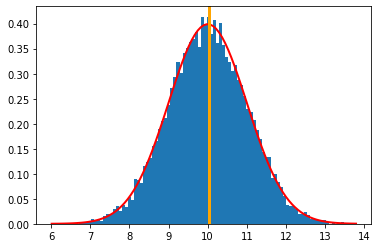

In [7]:
count, bins, ignored = plt.hist(numbers, 100, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - center)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.axvline(x, linewidth=3 ,color='orange')
plt.show()

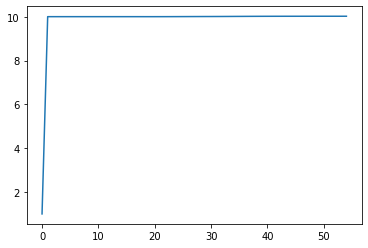

In [8]:
plt.plot(x_iter)